In [1]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from kando import kando_client
from sklearn.metrics import mean_squared_error, mean_absolute_error
from conv_lstm_prediction import ConvLSTM

**Training dates - 5 months**

In [2]:
start_date = datetime.datetime(2020, 1, 1, 0, 0).timestamp()
end_date = datetime.datetime(2020, 5, 31, 0, 0).timestamp()

**Prediction day**

In [3]:
pred_date = datetime.datetime(2020, 6, 20, 0, 0).timestamp()
pred_end_date = datetime.datetime(2020, 6, 21, 0, 0).timestamp()

**Fit & Predict - EC values**

In [4]:
model = ConvLSTM('ec')
model.fit(3436, start_date, end_date)
pred = model.predict(3436, pred_date)

API Connected
Model was built and compiled
Kando - GET /api/data/fetch?point_id=3436&unit_id=&start=1577829600.0&end=1590872400.0&raw_data=
Kando - GET /api/data/fetch?point_id=3436&unit_id=&start=1590872400&end=&raw_data=
Training first sample 2020-01-06 19:15:00, Training last sample 2020-05-30 21:00:00
Before normalization - Min value 200.0, Max value 19952.0
After normalization - Min value -2.073329761877812, Max value 29.557029322191024
Epoch 1/15
214/214 [==============================] - 5s 25ms/step - loss: 0.2280 - mae: 0.5021
Epoch 2/15
214/214 [==============================] - 6s 26ms/step - loss: 0.1409 - mae: 0.3768
Epoch 3/15
214/214 [==============================] - 6s 26ms/step - loss: 0.1293 - mae: 0.3570
Epoch 4/15
214/214 [==============================] - 6s 27ms/step - loss: 0.1250 - mae: 0.3487
Epoch 5/15
214/214 [==============================] - 6s 27ms/step - loss: 0.1211 - mae: 0.3416
Epoch 6/15
214/214 [==============================] - 6s 28ms/step - loss:

**Evaluating the Prediction with Actual Values**

In [5]:
with open('key.json') as f:
    secret = json.load(f)
# print(secret['key'], secret['secret'])
client = kando_client.client("https://fake-app.herokuapp.com", secret['key'], secret['secret'])

In [6]:
data = client.get_all(3436, '', pred_date, pred_end_date)

Kando - GET /api/data/fetch?point_id=3436&unit_id=&start=1592600400.0&end=1592686800.0&raw_data=
Kando - GET /api/data/fetch?point_id=3436&unit_id=&start=1592686800&end=&raw_data=


In [7]:
y_val = pd.DataFrame(data['samplings']).T

In [8]:
y_val.index = y_val.DateTime.astype('int').astype("datetime64[s]")

In [9]:
y_val = y_val[['EC']].astype('float')

In [10]:
y_val = y_val.resample('15T').pad() # getting the full size of the prediction sample set

In [11]:
y_val = y_val.EC.values

In [12]:
y_val

array([1624., 1640., 1632., 1616., 1664., 1760., 1832., 1864., 1864.,
       1864., 1752., 1720., 1696., 1608., 1584., 1568., 1544., 1512.,
       1496., 1448., 1432., 1424., 1392., 1408., 1392., 1464., 1432.,
       1440., 1424., 1456., 1432., 1424., 1488., 1592., 1696., 1792.,
       1896., 2216., 1936., 1952., 1912., 2080., 2128., 2128., 2080.,
       2008., 2008., 2096., 2056., 2416., 2744., 2864., 2664., 2392.,
       2536., 2280., 2240., 2192., 2088., 1912., 1848., 1864., 1816.,
       1784., 1720., 1672., 1656., 1656., 1656., 1624., 1600., 1568.,
       1632., 1624., 1616., 1616., 1592., 1576., 1584., 1584., 1576.,
       1544., 1552., 1536., 1576., 1584., 1552., 1496., 1496., 1520.,
       1512., 1544., 1552., 1584., 1592., 1584.])

In [13]:
x_axis = np.arange(len(y_val))

In [14]:
pred = pred[0]

In [15]:
anomaly = y_val[y_val > pred*1.2]

In [16]:
anomaly_ind = np.argwhere(y_val > pred*1.2)

In [17]:
plt.style.use('fivethirtyeight')

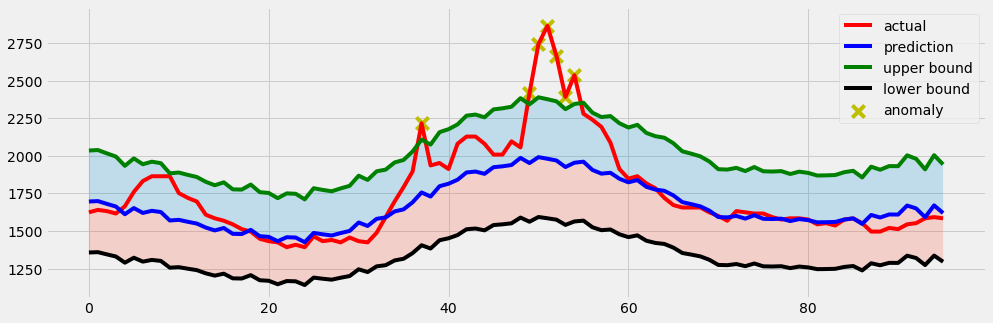

In [18]:
f, ax = plt.subplots(figsize=(15, 5))
plt.plot(x_axis, y_val, color='r', label='actual')
plt.plot(x_axis, pred, color='b', label='prediction')
plt.plot(x_axis, pred*1.2, color='g', label='upper bound')
plt.plot(x_axis, pred*0.8, color='k', label='lower bound')
plt.scatter(anomaly_ind, anomaly, color='y', marker='x', s=150, label='anomaly')
ax.fill_between(x_axis, pred, pred*1.2, alpha=0.2)
ax.fill_between(x_axis, pred, pred*0.8, alpha=0.2)
plt.legend();

In [19]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

**Metrics**

MAPE:

In [20]:
mean_absolute_percentage_error(y_val, pred)

6.107191381139308

MAE:

In [21]:
mean_absolute_error(y_val, pred)

123.56701151529948

RMSE:

In [22]:
np.sqrt(mean_squared_error(y_val, pred))

206.0442368559519

**Predicting on 882 after training on 3436**

In [23]:
pred = model.predict(882, pred_date)

Kando - GET /api/data/fetch?point_id=882&unit_id=&start=1592427585.0&end=1592600385.0&raw_data=
Kando - GET /api/data/fetch?point_id=882&unit_id=&start=1592599500&end=&raw_data=


In [24]:
data = client.get_all(882, '', pred_date, pred_end_date)

Kando - GET /api/data/fetch?point_id=882&unit_id=&start=1592600400.0&end=1592686800.0&raw_data=
Kando - GET /api/data/fetch?point_id=882&unit_id=&start=1592686800&end=&raw_data=


In [25]:
y_val = pd.DataFrame(data['samplings']).T

In [26]:
y_val.index = y_val.DateTime.astype('int').astype("datetime64[s]")

In [27]:
y_val = y_val[['EC']].astype('float')

In [28]:
y_val = y_val.resample('15T').pad() # getting the full size of the prediction sample set

In [29]:
y_val = y_val.EC.values

In [30]:
x_axis = np.arange(len(y_val))

In [31]:
pred = pred[0]

In [32]:
anomaly = y_val[y_val > pred*1.2]

In [33]:
anomaly_ind = np.argwhere(y_val > pred*1.2)

In [34]:
plt.style.use('fivethirtyeight')

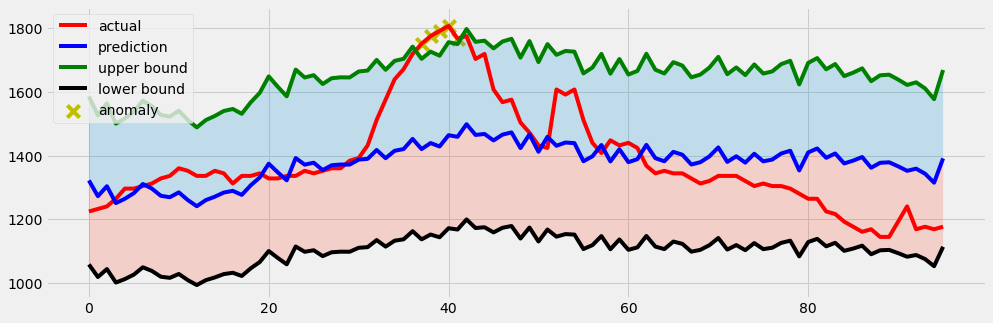

In [35]:
f, ax = plt.subplots(figsize=(15, 5))
plt.plot(x_axis, y_val, color='r', label='actual')
plt.plot(x_axis, pred, color='b', label='prediction')
plt.plot(x_axis, pred*1.2, color='g', label='upper bound')
plt.plot(x_axis, pred*0.8, color='k', label='lower bound')
plt.scatter(anomaly_ind, anomaly, color='y', marker='x', s=150, label='anomaly')
ax.fill_between(x_axis, pred, pred*1.2, alpha=0.2)
ax.fill_between(x_axis, pred, pred*0.8, alpha=0.2)
plt.legend();

**Metrics**

MAPE:

In [36]:
mean_absolute_percentage_error(y_val, pred)

7.627759202594681

MAE:

In [37]:
mean_absolute_error(y_val, pred)

107.84988911946614

RMSE:

In [38]:
np.sqrt(mean_squared_error(y_val, pred))

140.77679667521718

**Comparing to Prophet's results**

<div class="alert alert-block alert-info">
<b>Note:</b> As opposed to the CNN_LSTM model above, with Prophet we train until the prediction, with no gap.</div>

In [39]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [40]:
data2 = client.get_all(882, '', start_date, pred_end_date)

Kando - GET /api/data/fetch?point_id=882&unit_id=&start=1577829600.0&end=1592686800.0&raw_data=
Kando - GET /api/data/fetch?point_id=882&unit_id=&start=1592686800&end=&raw_data=


In [41]:
df = pd.DataFrame(data2['samplings']).T
df.index = df.DateTime.astype('int').astype("datetime64[s]")
keep_cols = ['EC']
df = df[keep_cols]
col_to_float = ['EC']
for col in col_to_float:
    df[col]=df[col].astype('float64')
df = df.resample('15T').pad()
split = df.shape[0] - 24*4
df, y_val = df[:split], df[split:]
ub = df.EC.mean() + 3*df.EC.std()
lb = df.EC.mean() - 3*df.EC.std()
ec = df.EC.clip(lb, ub)
ec[ec==0] = np.nan
ec.interpolate(limit_direction='both', inplace=True)

In [42]:
X = ec.reset_index(drop=False, inplace=False)

In [43]:
X.columns = ['ds', 'y']

In [44]:
y_val = y_val.EC.reset_index(drop=False, inplace=False)
y_val.columns = ['ds', 'y']

In [45]:
m = Prophet()
m.fit(X)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [46]:
future = m.make_future_dataframe(periods=y_val.shape[0], freq='15T', include_history=False)
future.tail()

,ds
91,2020-06-20 20:00:00
92,2020-06-20 20:15:00
93,2020-06-20 20:30:00
94,2020-06-20 20:45:00
95,2020-06-20 21:00:00


In [47]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
91,2020-06-20 20:00:00,1091.709739,862.650352,1308.994317
92,2020-06-20 20:15:00,1091.660587,860.562779,1327.131169
93,2020-06-20 20:30:00,1092.320611,859.240590,1324.995043
94,2020-06-20 20:45:00,1093.640192,872.679546,1325.017230
95,2020-06-20 21:00:00,1095.554480,875.556230,1337.223641


In [48]:
forecast['truth'] = y_val.y.values

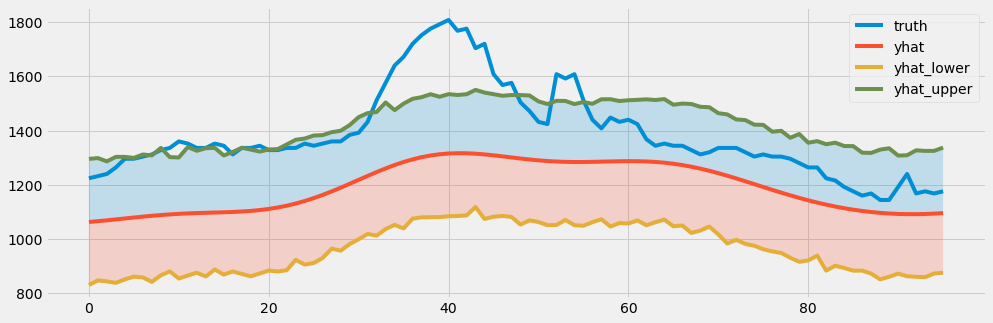

In [49]:
f, ax = plt.subplots(figsize=(15, 5))
forecast[['truth', 'yhat', 'yhat_lower', 'yhat_upper']].plot(ax=ax) #
ax.fill_between(forecast.index, forecast.yhat.values, forecast.yhat_upper.values, alpha=0.2)
ax.fill_between(forecast.index, forecast.yhat.values, forecast.yhat_lower.values, alpha=0.2);

**Metrics**

MAPE:

In [50]:
mean_absolute_percentage_error(forecast.truth.values, forecast.yhat)

13.55957676887955

MAE:

In [51]:
mean_absolute_error(forecast.truth.values, forecast.yhat)

195.957373830919

RMSE:

In [52]:
np.sqrt(mean_squared_error(forecast.truth.values, forecast.yhat))

225.49728688687864

**Loading a fitted model and predicting**

In [4]:
fitted_model = ConvLSTM('EC', 'EC_3436_CNN_LSTM.h5')
pred = fitted_model.predict(3436, pred_date)
pred

API Connected
Kando - GET /api/data/fetch?point_id=3436&unit_id=&start=1592427585.0&end=1592600385.0&raw_data=
Kando - GET /api/data/fetch?point_id=3436&unit_id=&start=1592599500&end=&raw_data=


array([[1695.9829, 1698.5737, 1680.0657, 1662.4275, 1611.1399, 1652.2351,
        1619.8502, 1634.028 , 1625.8286, 1569.5791, 1573.8428, 1560.8456,
        1549.1614, 1522.5133, 1503.4333, 1519.6218, 1480.7299, 1479.4146,
        1507.2654, 1464.9849, 1460.62  , 1431.7676, 1458.3461, 1456.0719,
        1425.1122, 1486.9204, 1477.5426, 1469.8418, 1485.9467, 1500.126 ,
        1556.2317, 1533.0518, 1580.6078, 1590.033 , 1629.707 , 1643.8585,
        1690.6611, 1756.0979, 1728.8516, 1797.8263, 1814.1544, 1840.655 ,
        1889.239 , 1895.2004, 1880.0508, 1924.0585, 1929.9858, 1938.66  ,
        1986.1642, 1951.7155, 1991.1017, 1980.2751, 1968.713 , 1925.3564,
        1953.9956, 1960.7416, 1905.8837, 1881.3065, 1887.0503, 1847.3961,
        1823.5422, 1838.4326, 1793.4562, 1775.2739, 1766.8843, 1736.4854,
        1691.5729, 1678.244 , 1663.537 , 1635.3127, 1592.3475, 1590.2579,
        1599.8798, 1581.9886, 1604.3961, 1580.8368, 1579.3768, 1581.7109,
        1565.785 , 1578.875 , 1571.779